# KNN- K-Nearest Neighbors

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.    

## Importing Library

K means the number of nearest neabour we are looking and then we assign the data points.

'k' in KNN is a parameter that refers to the number of nearest neighbours to include in the majority of the voting process. ... 

Let's say k = 5 and the new data point is classified by the majority of votes from its five neighbours and the new point would be classified as red since four out of five neighbours are red.

In the below example, the 3 data points(red) are in majority compared to 2 data points(blue) so, the data point (x1,y1) belongs to red color class only and we classify as label 2.

K means the number of nearest neighbours we are looking and we assign the data point to that class which is having the majority of the nearest neighbour closer to that datapoint.

While doing so, we can choose any distance measure: Eucledian or Manhattan.

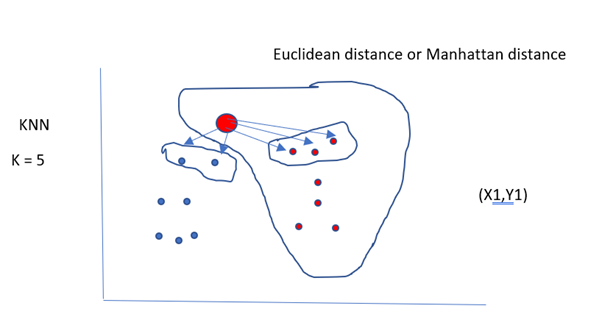

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

## About Data

This data comprised of kernels belonging to two different varieties of wheat: Kama and Canadian.

To construct the data, seven geometric parameters of wheat kernels were measured: 
1. area A, 
2. perimeter P, 
3. compactness C = 4.pi.A / P^2, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove.     

## Loading Data

In [2]:
data = pd.read_csv(r"KNN\seed_data.csv")

**A little bit of data exploration**

In [3]:
data.head(10)

,area,perimeter,compactness,length,width,asymmetry,length_kernel_groove,kernel
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,0
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,0
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,0
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,0
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   length                210 non-null    float64
 4   width                 210 non-null    float64
 5   asymmetry             210 non-null    float64
 6   length_kernel_groove  210 non-null    float64
 7   kernel                210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


#### Counting unique values

In [5]:
data['kernel'].unique()

array([0, 1, 2], dtype=int64)

In [6]:
data['kernel'].value_counts()

2    70
1    70
0    70
Name: kernel, dtype: int64

#### Splitting data (into input and output)

In [7]:
# training dataset and labels
x = data.drop(data.columns[[7]], axis = 1)
y = data['kernel']

In [8]:
x.head()

,area,perimeter,compactness,length,width,asymmetry,length_kernel_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: kernel, dtype: int64

In [10]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state =0)

## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

# <font color = "green">K Nearest Neighbor</font>

### Training model

In [12]:
# using sklearn library
# fitting k-NN model
#here, n_neighbours means we are taking into accout 3 closest neighbours
# p = 2, means we are considering eucledian distance
#p=1, means we are considering manhatton distance

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 3, p=2)#initialise model

knn_classifier.fit(xtrain, ytrain)#train model


KNeighborsClassifier(n_neighbors=3)

### Predicting Test_input

In [14]:
y_pred = knn_classifier.predict(xtest)

### Results

In [15]:
# Building confusion MAtrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred)

In [16]:
cm

array([[16,  1,  0],
       [ 2, 19,  0],
       [ 0,  0, 15]], dtype=int64)

In [17]:
# finding accuracy

from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_pred)

0.9433962264150944